In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('covid_data.csv')

# Data Summarization

In [3]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [5]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


# Data Visualization

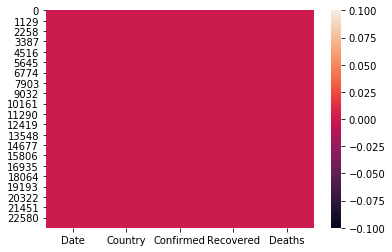

In [6]:
#Null values :
sns.heatmap(df.isnull())

# Data Manipulation

In [7]:
#drop the rows where there are no cases: 
df_new = df[df['Confirmed'] != 0]
df_new

,Date,Country,Confirmed,Recovered,Deaths
36,2020-01-22,China,548,28,17
87,2020-01-22,Japan,2,0,0
91,2020-01-22,"Korea, South",1,0,0
165,2020-01-22,Taiwan*,1,0,0
168,2020-01-22,Thailand,2,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [8]:
#drop the rows whose column values of Recovered and Deaths are BOTH 0 as we will not be able to come to any conclusion 
#about the patients who were confirmed covid positive.

df_new = (df_new[((df_new['Recovered'] != 0) | (df['Deaths'] != 0))])


In [9]:
df_new['Date']=pd.to_datetime(df_new['Date'])
df_new['Year'] = df_new['Date'].dt.year
df_new['Month'] = df_new['Date'].dt.month
df_new['Day'] = df_new['Date'].dt.day


In [10]:
df_new = df_new[['Year','Day','Month','Country','Confirmed','Recovered','Deaths']]

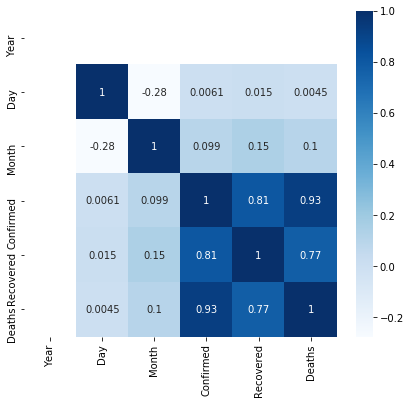

In [11]:
plt.figure(figsize=(7,6))
corr = df_new.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

In [12]:
df_new.drop('Year',axis=1,inplace=True)
df_new.drop('Month',axis=1,inplace=True)
df_new.drop('Day',axis=1,inplace=True)

In [16]:
#Encode country column : 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_new['Country'])
df_new['Country'] = le.transform(df_new['Country'])



In [17]:
df_new

,Country,Confirmed,Recovered,Deaths
36,36,548,28,17
224,36,643,30,18
412,36,920,36,26
600,36,1406,39,42
788,36,2075,49,56
...,...,...,...,...
23683,182,429,365,3
23684,183,9,6,1
23685,184,249,10,49
23686,185,920,336,7


In [18]:
#Check for skewness : 

print("Skewness value in all columns : ")
print(df_new.skew())

Skewness value in all columns : 
Country      -0.010594
Confirmed    13.998104
Recovered     7.929357
Deaths       10.591724
dtype: float64


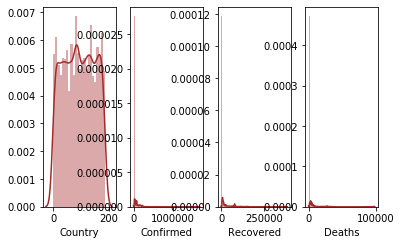

In [21]:
#Skewness graph :
col = df_new.columns.values
plt.figure(figsize=(17,70))
for i in range(0,len(col)):
    plt.subplot(16,11,i+1)
    sns.distplot(df_new[col[i]],color='brown')
plt.show()   

Extreme skewness present. Need to be scaled.

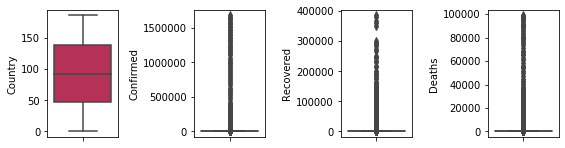

In [22]:
colname = df_new.columns.values
plt.figure(figsize = (10,10))
for i in range(0,len(colname)):
    plt.subplot(5,5,i+1)
    sns.boxplot(df_new[colname[i]],palette="rocket",orient='v')
    plt.tight_layout()

Data is wide spread. Needs to be scaled.

In [23]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(df_new)
df_new = pd.DataFrame(scaler.transform(df_new))
df_new

,0,1,2,3
0,-1.057138,-0.177214,-0.229928,-0.175012
1,-1.057138,-0.175992,-0.229829,-0.174824
2,-1.057138,-0.172430,-0.229530,-0.173320
3,-1.057138,-0.166179,-0.229380,-0.170310
4,-1.057138,-0.157575,-0.228882,-0.167677
...,...,...,...,...
13169,1.649894,-0.178745,-0.213136,-0.177646
13170,1.668435,-0.184146,-0.231025,-0.178022
13171,1.686976,-0.181060,-0.230825,-0.168994
13172,1.705518,-0.172430,-0.214581,-0.176893


In [24]:
#remove skewness

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
df_new = pd.DataFrame(pt.fit_transform(df_new))

df_new.skew()

0   -0.003150
1    1.500611
2    1.675581
3    2.036091
dtype: float64

In [25]:
from scipy.stats import zscore

z =np.abs(zscore(df_new))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


No outliers are present.

<Figure size 1152x1152 with 0 Axes>

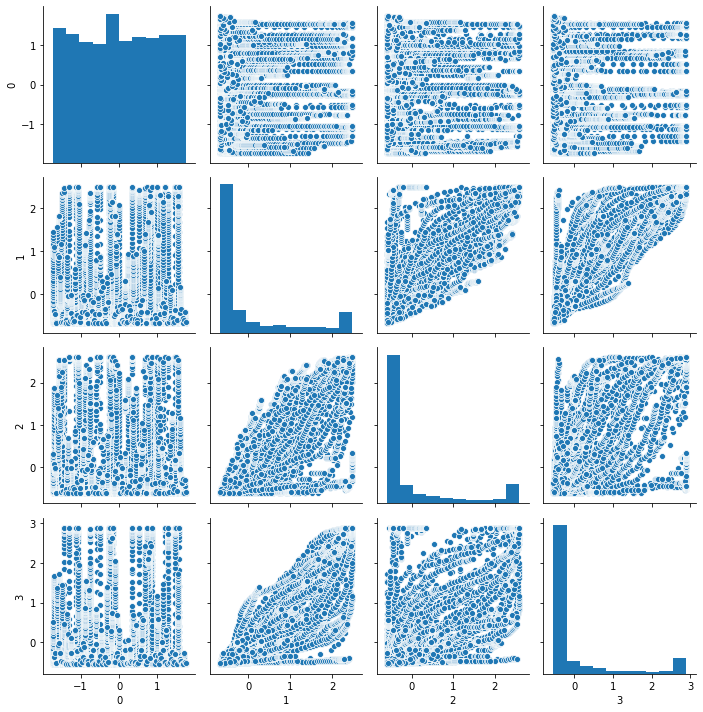

In [30]:
#pairplot
plt.figure(figsize=(16,16))
sns.pairplot(df_new)
plt.tight_layout()
plt.show()
    

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df_new.iloc[:,0:3]
y= df_new.iloc[:,3]

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




def random_state_counter(model):
    max_r2_score=0
    for j in range(10,90):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=j)
        reg = model
        reg.fit(x_train,y_train)
        y_pred = reg.predict(x_test)
        score = r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score = score
            final_state = j
    return final_state,max_r2_score

In [33]:
lr = LinearRegression()
svr = SVR()
knr = KNR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
model = [lr,svr,knr,dtr,rfr]

for each in range(len(model)):
    print("-------------------------------------------------------")
    print(model[each])
    seed,score = random_state_counter(model[each])
    print("-------------------------------------------------------")
    print("Random State is ", seed , "with score : ",score)
    print("-------------------------------------------------------")

    print("\n")


-------------------------------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
-------------------------------------------------------
Random State is  24 with score :  0.8659365175648414
-------------------------------------------------------


-------------------------------------------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-------------------------------------------------------
Random State is  50 with score :  0.9022350771924155
-------------------------------------------------------


-------------------------------------------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
-------------------------------------------------------
Random State is  24 with scor

RandomForest Regressor gives the highest r2 score.

In [34]:
#RFR
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=77)
final_reg = rfr
final_reg.fit(x_train,y_train)
y_pred = final_reg.predict(x_test)

print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.9883601899999799


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Create the random grid
random_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}


jobs=-1
rfr_grid = GridSearchCV(estimator=final_reg,
                      param_grid=random_grid,
                      scoring='r2',
                      cv=5,
                      n_jobs=jobs)

cv_score = cross_val_score(rfr_grid,X,y,cv=5,scoring='r2')
print("Cross Validation Score : ", cv_score.mean())

Cross Validation Score :  0.8955103728200904


In [36]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error  : ",mean_squared_error(y_test,y_pred))

Mean Absolute Error :  0.035045056225237584
Mean Squared Error  :  0.011445055670755577


In [37]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


ada = AdaBoostRegressor(n_estimators=100,random_state=124)
reg = GradientBoostingRegressor(n_estimators=100,random_state=13)

boosting_model = [ada,reg]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("R2 Score : ", r2)
    print("\n")
    


-----------------------------------------------------------
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=124)
-----------------------------------------------------------
R2 Score :  0.9883601899999799


-----------------------------------------------------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=13, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=Fal

In [38]:
# Create the parameter distirbution
param_dist = { 
    'n_estimators': [50, 100],
    'learning_rate': [0.01,0.05,0.1,0.3,1],
    'loss': ['linear','square','exponential']
}


jobs=-1
ada_grid = GridSearchCV(estimator=ada,
                      param_grid=param_dist,
                      scoring='r2',
                      cv=5,
                      n_jobs=jobs)

cv_score = cross_val_score(ada_grid,X,y,cv=5,scoring='r2')
print("Cross Validation Score : ", cv_score.mean())

Cross Validation Score :  0.8691583111219714


Since AdaBoost Regressor gives low cross validation score when compared the random forest regressors and has high r2 score, hence we will finalise this model.

In [39]:
from sklearn.externals import joblib

joblib.dump(ada,'adaboostregressormodel.obj')

['adaboostregressormodel.obj']

In [40]:
ada_from_joblib = joblib.load('adaboostregressormodel.obj')
ada_from_joblib.predict(x_test)

array([ 2.51255734, -0.49941897,  0.21206821, ..., -0.49941897,
       -0.49941897, -0.49941897])